In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mean_01=[1,1]
cov_01=[[1,0.1],[0.1,2]]

mean_02=[4,5]
cov_02=[[1,0.1],[0.1,2]]

dist_01=np.random.multivariate_normal(mean_01,cov_01,500)
dist_02=np.random.multivariate_normal(mean_02,cov_02,500)

print (dist_01.shape,dist_02.shape)

(500, 2) (500, 2)


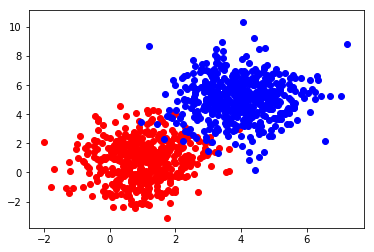

In [3]:
plt.scatter(dist_01[:,0],dist_01[:,-1],color="red")
plt.scatter(dist_02[:,0],dist_02[:,-1],color="blue")

In [5]:
data=np.concatenate((dist_01,dist_02))

In [39]:
K=2

cluster={}
for ix in range(K):
    center = {
        'coords':np.random.uniform(data.min(),data.max(),data.shape[1]),
        'points': [],
        'history': [],
    }
    cluster[ix]=center
for ix in range(K):
    print (cluster[ix]['coords'])
p=[1,2,5,3,0,0.5]
colors = ['red', 'yellow', 'cyan', 'orange']

[ 2.39864437  1.82471283]
[-2.5042161   2.47195047]


In [40]:
def distance(a1,a2):
    diff=(a1-a2)**2
    sum_d=diff.sum()

    return np.sqrt(sum_d)

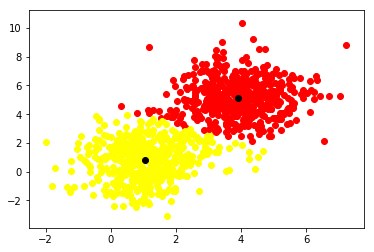

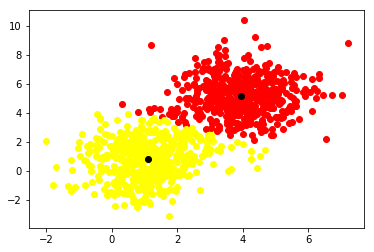

In [48]:
plt.figure(0)

for ix in range(data.shape[0]):
    d=[]
    for cx in range(K):
        d.append(distance(data[ix],cluster[cx]['coords']))
    c_id=np.argmin(d)
    cluster[c_id]['points'].append(data[ix])
    plt.scatter(data[ix, 0], data[ix, 1], color=colors[c_id])
    
for cx in range(K):
    plt.scatter(cluster[cx]['coords'][0], cluster[cx]['coords'][1], color='black')
plt.figure(1)

    
for cx in range(K):
    cluster[cx]['history'].append(cluster[cx]['coords'])
    if len(cluster[cx]['points']) is not 0:
        cluster[cx]['coords']=np.asarray(cluster[cx]['points']).mean(axis=0)
        pts = np.asarray(cluster[cx]['points'])
        plt.scatter(pts[:, 0], pts[:, 1], color=colors[cx])
    plt.scatter(cluster[cx]['coords'][0], cluster[cx]['coords'][1], color='black')
    cluster[cx]['points']=[]
plt.show()